##Using Gates_to_grid to map many radars to a Cartesian grid

In [42]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
from time import time
%matplotlib inline

Data available by FigShare Here: http://figshare.com/articles/Data_for_AMS_Short_Course_on_Open_Source_Radar_Software/1537461
Download and unpack into the data subdirectory of this repository 

In [43]:
filenames = ['./data/KVNX_20150513_1939',
            './data/KICT_20150513_1937',
            './data/KTLX_20150513_1935',
            './data/KFDR_20150513_1939',
            './data/KDDC_20150513_1940',
            './data/KEMX_20150513_1932',
            './data/KLBB_20150513_1939']

radars = [pyart.io.read(filename) for filename in filenames]

In [44]:
t1 = time()
grids = pyart.map.grid_from_radars(
         radars, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-500000, 500000), (-500000, 500000)),
        fields=['reflectivity'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
print(time() - t1)

16.7470049858


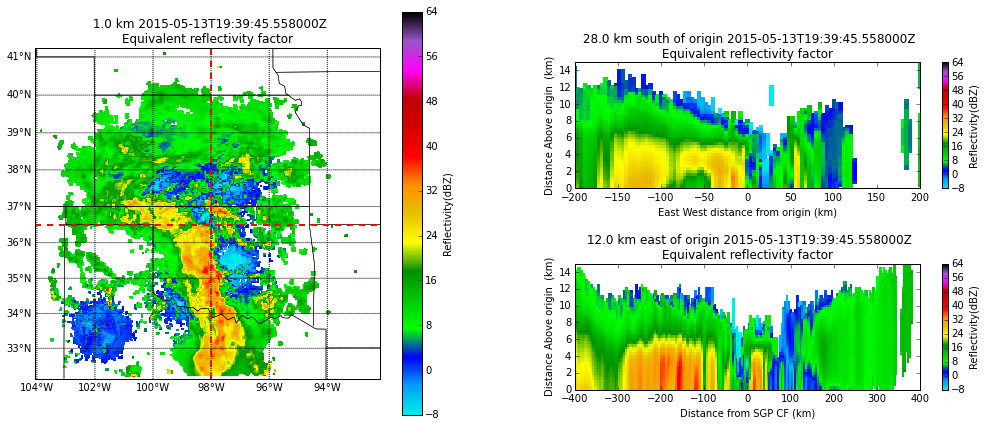

In [45]:
display = pyart.graph.GridMapDisplay(grids)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 3
vmin = -8
vmax = 64
lat = 36.5
lon = -98.0

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(lon=lon, lat=lat)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap = pyart.graph.cm.NWSRef)
ax2.set_ylim([0,15])
ax2.set_xlim([-400,400])
ax2.set_xlabel('Distance from SGP CF (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,15])
ax3.set_xlim([-200,200])
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                           cmap = pyart.graph.cm.NWSRef)


In [62]:
filenames = ['./data/KVNX20120501_040957_V06',
            './data/KTLX20120501_040805_V03',
            './data/KINX20120501_041024_V03']

radars = [pyart.io.read(filename) for filename in filenames]

In [60]:
t1 = time()
grids = pyart.map.grid_from_radars(
         radars, grid_shape=(52, 251, 251),
        grid_limits=((0, 17000.0),(-200000, 200000), (-200000, 200000)),
        fields=['reflectivity'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')
print(time() - t1)

35.2581419945


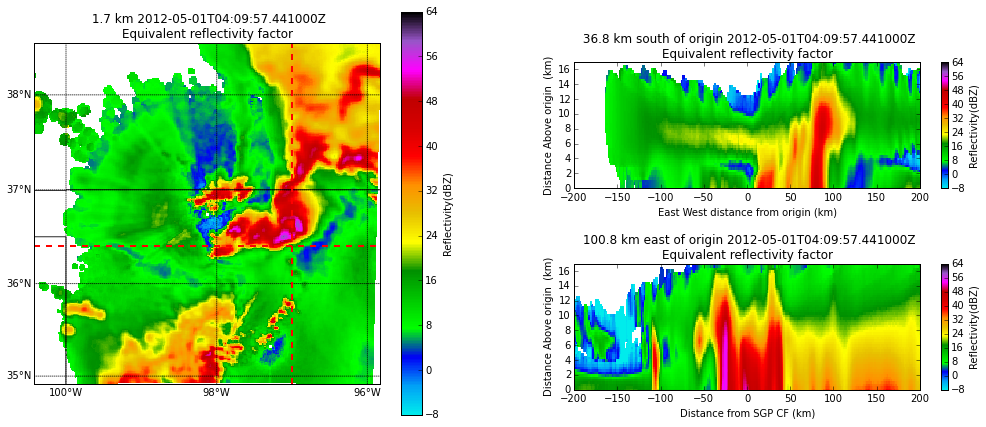

In [61]:
display = pyart.graph.GridMapDisplay(grids)
fig = plt.figure(figsize=[15, 7])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# parameters
level = 5 #21
vmin = -8
vmax = 64
lat = 36.4
lon = -97.0

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                 cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(lon=lon, lat=lat)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap = pyart.graph.cm.NWSRef)
ax2.set_ylim([0,17])
ax2.set_xlim([-200,200])

ax2.set_xlabel('Distance from SGP CF (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0,17])
ax3.set_xlim([-200,200])

display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                           cmap = pyart.graph.cm.NWSRef)

